In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import joblib

In [36]:
df=pd.read_csv(r"Data/Toddler_Autism.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


### Exploratory Data Analysis

In [37]:
df.shape

(1054, 19)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [39]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [40]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [41]:
# unique values in categorical column "Who completed the test"
df["Who completed the test"].value_counts()

Who completed the test
family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: count, dtype: int64

### Data Cleaning

In [42]:
df=df.drop(columns=["Qchat-10-Score","Case_No"])

In [43]:
# handle inconsistent categorical values
df.rename(columns={'Who completed the test': 'Who_completed_the_test'}, inplace=True)
df["Who_completed_the_test"] = df["Who_completed_the_test"].str.lower().replace('Health care professional', 'health care professional')

In [44]:
# missing values
print(df.isnull().sum())
# duplicates
print(df.duplicated().sum())

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who_completed_the_test    0
Class/ASD Traits          0
dtype: int64
79


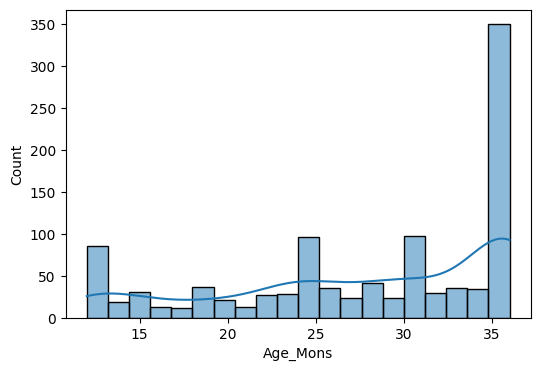

In [46]:
cols=['Age_Mons']
for c in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[c],kde=True,bins=20)

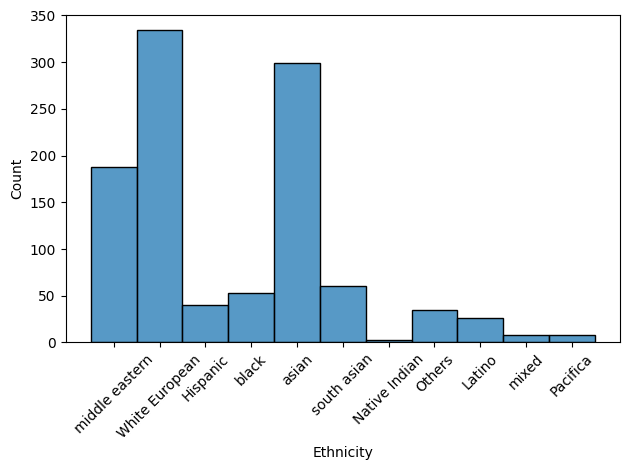

In [47]:
sns.histplot(df["Ethnicity"],kde=False,bins=20)    
plt.xticks(rotation=45)
plt.tight_layout()

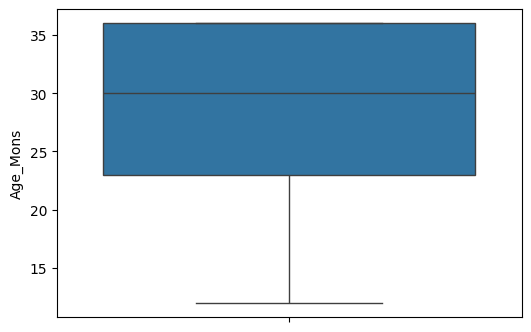

In [48]:
for c in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[c])

<Axes: xlabel='Class/ASD Traits ', ylabel='count'>

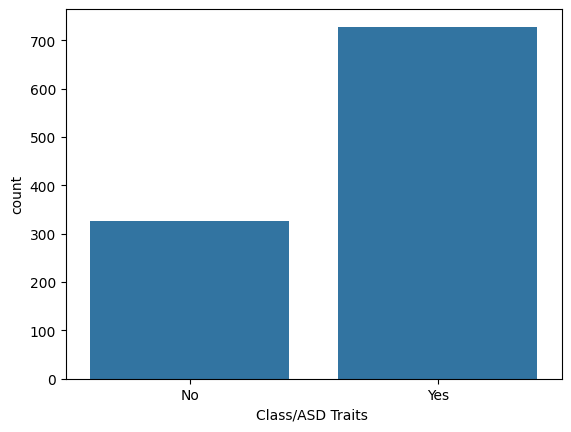

In [49]:
sns.countplot(x=df["Class/ASD Traits "])

In [50]:
# handle outliars
Q1 = np.percentile(df['Age_Mons'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['Age_Mons'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
lower = df['Age_Mons'] <= (Q1-1.5*IQR)
upper = df['Age_Mons'] >= (Q3+1.5*IQR)
df= df[~(upper | lower)]
df.shape

(1054, 17)

### Data preprocessing

In [51]:
# label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoders={}
cols=["Sex","Jaundice","Family_mem_with_ASD","Class/ASD Traits "]
for c in cols:
    le=LabelEncoder()
    df[c]=le.fit_transform(df[c])
    label_encoders[c]=le
# save label encoders
joblib.dump(label_encoders,r'Model/Label_Encoders.pkl')    

['Model/Label_Encoders.pkl']

In [52]:
# one hot encoding
df=pd.get_dummies(df,columns=["Ethnicity","Who_completed_the_test"],drop_first=False)
# drop_first=True drop first category to reduce collinearity

In [54]:
# feature scaling - standardization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
cols=["Age_Mons"]
df[cols]=scaler.fit_transform(df[cols])
# save atandard scaler
joblib.dump(scaler,r'Model/Standard_Scaler.pkl')

['Model/Standard_Scaler.pkl']

In [55]:
x=df["Class/ASD Traits "].value_counts()
print(x)

Class/ASD Traits 
1    728
0    326
Name: count, dtype: int64


In [56]:
print("Minimum Age",df["Age_Mons"].min())
print("Maximum Age",df["Age_Mons"].max())

Minimum Age -1.9892232750250607
Maximum Age 1.0195899254672818


In [57]:
# Discrtization/ Binning
# df["Age_Mons"]=pd.cut(df["Age_Mons"],
#                       bins=[-1,16,32,48,df['Age_Mons'].max()],
#                       labels=["Under 16","Under 32","Under 48","Above 48"])

### Feature Selection

In [58]:
#convert all columns into numeric values
df_fs=df.astype(int)

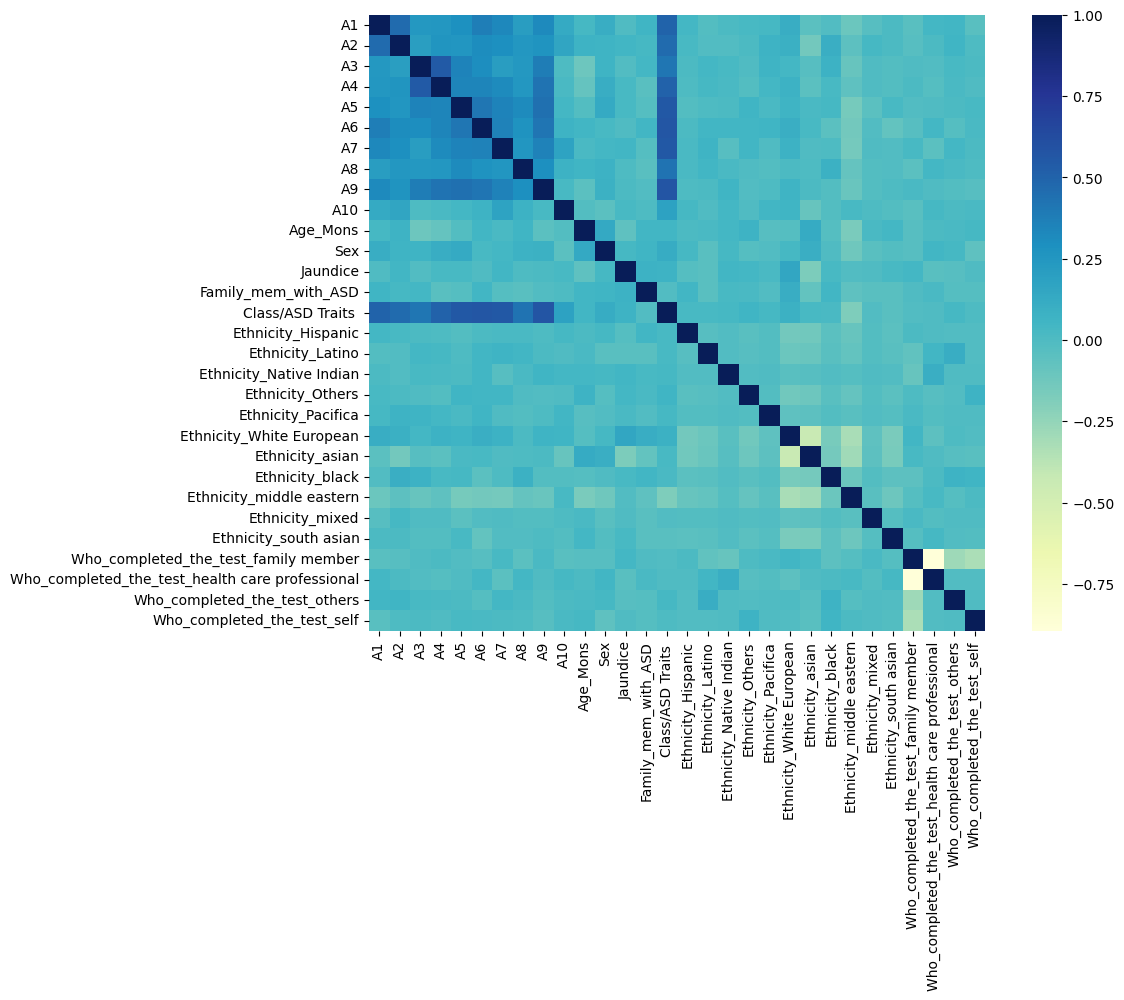

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df_fs.corr(numeric_only=True),annot=False,cbar =True, cmap = 'YlGnBu',
            square = True)
plt.show()

In [62]:
# diagonals are highly correlated
# drop Case_No as it is unique,
# drop Q-chat-10-Score as it is highly correlated with A1 to A10 
# df=df.drop(columns=["Qchat-10-Score","Case_No"])

In [63]:
df['Class/ASD Traits ']= df['Class/ASD Traits '].replace({'Yes':1,'No':0})
# handle class imbalance
smote = SMOTE(random_state=42, k_neighbors=5)
X = df.drop(['Class/ASD Traits '], axis=1)
y = df['Class/ASD Traits ']
X_res, y_res = smote.fit_resample(X, y)
print("Original class distribution: ",y.value_counts())
print("Resampled class distribution: ",y_res.value_counts())

Original class distribution:  Class/ASD Traits 
1    728
0    326
Name: count, dtype: int64
Resampled class distribution:  Class/ASD Traits 
0    728
1    728
Name: count, dtype: int64


In [64]:
df_resampled = pd.concat([X_res, y_res], axis=1)
df_resampled.shape

(1456, 30)

In [65]:
df_resampled.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who_completed_the_test_family member,Who_completed_the_test_health care professional,Who_completed_the_test_others,Who_completed_the_test_self,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,True,False,False,False,0
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,True,False,False,False,1
2,1,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,True,False,False,False,1
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,True,False,False,False,1
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,True,False,False,False,1


In [66]:
df_resampled.to_csv(r"Data/Toddler_Autism_Processed.csv",header=True,index=False)

In [67]:
# can use ColumnTransformer to save preprocessing but it does not support label encoding